In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('max_columns', None)

## 数据加载

In [2]:
train = pd.read_csv('./data/cs-training.csv', index_col=0)
train.head(3)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0


In [3]:
test = pd.read_csv('./data/cs-test.csv', index_col=0)
test.head(3)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0


In [4]:
data = pd.concat([train, test], ignore_index=True)
data['SeriousDlqin2yrs'] = data['SeriousDlqin2yrs'].fillna(-1)
data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1.0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0.0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0.0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0.0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
251498,-1.0,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
251499,-1.0,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
251500,-1.0,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
251501,-1.0,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251503 entries, 0 to 251502
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      251503 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  251503 non-null  float64
 2   age                                   251503 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  251503 non-null  int64  
 4   DebtRatio                             251503 non-null  float64
 5   MonthlyIncome                         201669 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       251503 non-null  int64  
 7   NumberOfTimes90DaysLate               251503 non-null  int64  
 8   NumberRealEstateLoansOrLines          251503 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  251503 non-null  int64  
 10  NumberOfDependents                    244953 non-null  float64
dtype

## 数据探索性分析

In [6]:
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,251503.000000,251503.000000,251503.000000,251503.000000,251503.000000,2.016690e+05,251503.000000,251503.000000,251503.000000,251503.000000,244953.000000
mean,-0.363721,5.750415,52.339694,0.434245,349.562468,6.744818e+03,8.453064,0.278370,1.016155,0.252466,0.761995
std,0.557815,229.633980,14.775120,4.335643,1884.792016,2.571761e+04,5.145194,4.312539,1.121935,4.299204,1.123905
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.000000,0.029977,41.000000,0.000000,0.174330,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.153575,52.000000,0.000000,0.365612,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.561293,63.000000,0.000000,0.861754,8.212000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,7.727000e+06,85.000000,98.000000,54.000000,98.000000,43.000000


### SeriousDlqin2yrs (label)

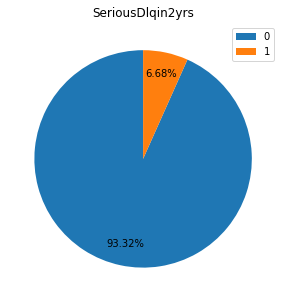

In [7]:
label_counts = train['SeriousDlqin2yrs'].value_counts()
plt.figure(figsize=(6,5))
plt.pie(label_counts, labels=label_counts.index, labeldistance=None, startangle=90, autopct='%1.2f%%', pctdistance=0.8)
plt.title('SeriousDlqin2yrs');
plt.legend()

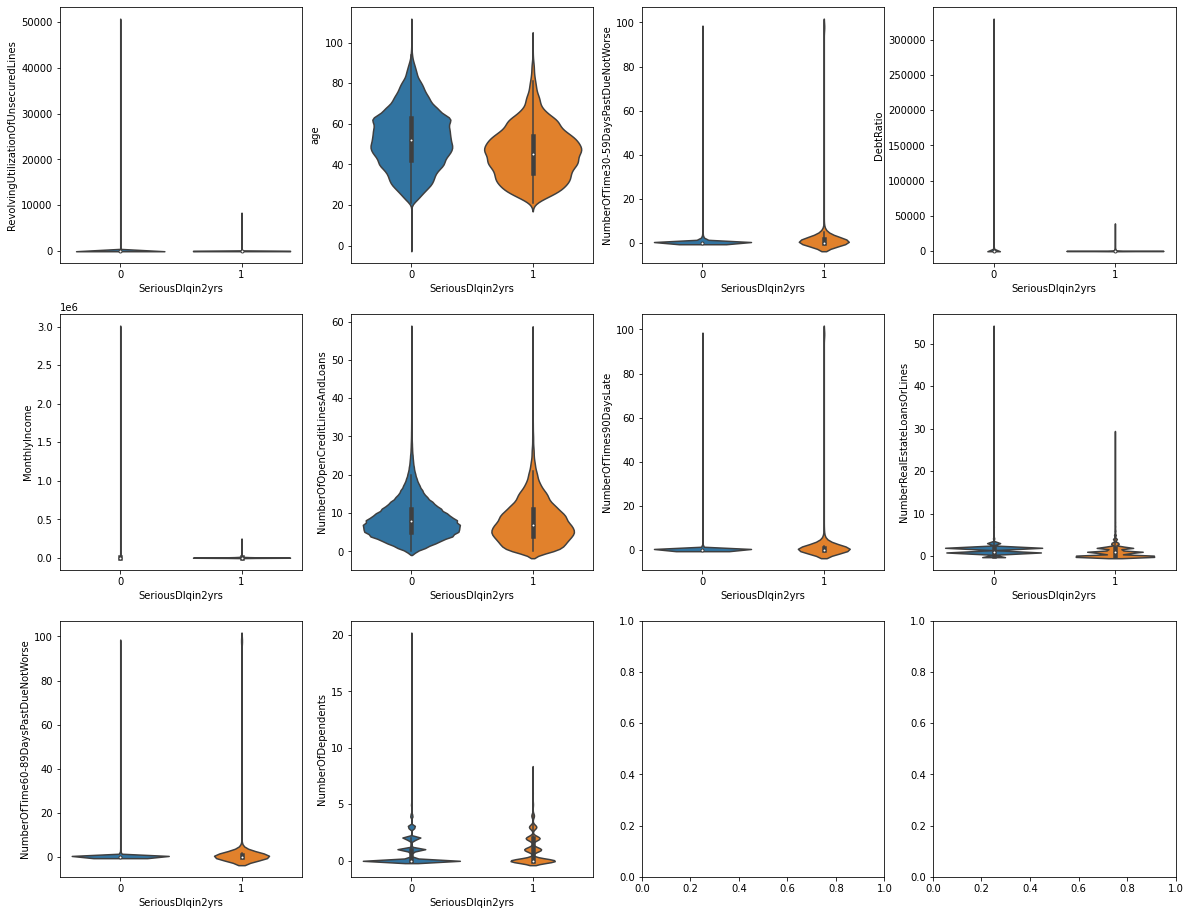

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 16))
for i, col in enumerate(train.columns[1:]):
    r, c = divmod(i, 4)
    sns.violinplot(train['SeriousDlqin2yrs'], train[col], ax=axes[r, c])

In [9]:
# 查看缺失值
data.isna().sum()[data.isna().any()]

MonthlyIncome         49834
NumberOfDependents     6550
dtype: int64

## WOE计算

### RevolvingUtilizationOfUnsecuredLines
信用卡和个人信用额度的总余额（不动产和汽车贷款等无分期付款债务除外）除以信用额度之和

In [10]:
data['RevolvingUtilizationOfUnsecuredLines'].describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.995])

count    251503.000000
mean          5.750415
std         229.633980
min           0.000000
25%           0.029977
50%           0.153575
75%           0.561293
95%           1.000000
99.5%         1.358733
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [72]:
def cal_woe(box_name, show=True):
    box = box_name
    tmp_data = data[data['SeriousDlqin2yrs'] != -1]
    total_bad, total_good = tmp_data['SeriousDlqin2yrs'].sum(), (1 - tmp_data['SeriousDlqin2yrs']).sum()
    box_bad = tmp_data.groupby(box)['SeriousDlqin2yrs'].sum()
    box_good = tmp_data.groupby(box)['SeriousDlqin2yrs'].count() - box_bad
    df_box = pd.DataFrame([box_bad, box_good], index=['bad', 'good']).T
    df_box['margin_bad'] = df_box['bad'] / total_bad
    df_box['margin_good'] = df_box['good'] / total_good
    df_box['woe'] = np.log(df_box['margin_bad'] / df_box['margin_good'])
    df_box['sample_ratio'] = tmp_data.groupby(box)['SeriousDlqin2yrs'].count() / tmp_data.shape[0]
    if show:
        display(df_box)
    return df_box['woe']

In [73]:
# RevolvingUtilizationOfUnsecuredLines取1以上的为一个箱,0到1之间等距划分为5个箱
bins = [0, 0.2, 0.4, 0.6, 0.8, 1, data['RevolvingUtilizationOfUnsecuredLines'].max()]
data['Box_RUOUL'] = pd.cut(data['RevolvingUtilizationOfUnsecuredLines'], bins=bins, include_lowest=True)
tmp_woe = cal_woe('Box_RUOUL')

,bad,good,margin_bad,margin_good,woe,sample_ratio
Box_RUOUL,,,,,,
"(-0.001, 0.2]",1647.0,80062.0,0.164273,0.571982,-1.247578,0.544730
"(0.2, 0.4]",871.0,18973.0,0.086874,0.135548,-0.444862,0.132294
"(0.4, 0.6]",1005.0,12211.0,0.100239,0.087238,0.138918,0.088107
"(0.6, 0.8]",1205.0,8893.0,0.120188,0.063534,0.637483,0.067320
"(0.8, 1.0]",4061.0,17750.0,0.405047,0.126810,1.161312,0.145408
"(1.0, 50708.0]",1237.0,2084.0,0.123379,0.014889,2.114668,0.022140


In [13]:
# 最后一组的样本占比少于5%，需调整分箱；而第一组占比较大，可适当拆分
bins = [0, 0.1, 0.3, 0.5, 0.7, 0.9, float('inf')]
data['Box_RUOUL'] = pd.cut(data['RevolvingUtilizationOfUnsecuredLines'], bins=bins, include_lowest=True)
tmp_woe = cal_woe('Box_RUOUL')

,bad,good,margin_bad,margin_good,woe,sample_ratio
Box_RUOUL,,,,,,
"(-0.001, 0.1]",1166.0,63238.0,0.116298,0.451784,-1.357051,0.429360
"(0.1, 0.3]",895.0,27583.0,0.089268,0.197058,-0.791856,0.189853
"(0.3, 0.5]",926.0,14904.0,0.092360,0.106477,-0.142236,0.105533
"(0.5, 0.7]",1085.0,10255.0,0.108219,0.073264,0.390090,0.075600
"(0.7, 0.9]",1468.0,8411.0,0.146419,0.060090,0.890636,0.065860
"(0.9, inf]",4486.0,15583.0,0.447437,0.111328,1.391056,0.133793


In [14]:
# woe满足单调性
data = data.merge(tmp_woe.rename('WOE_RUOUL'), on='Box_RUOUL', how='inner')
data.sample(3)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Box_RUOUL,WOE_RUOUL
213439,-1.0,0.006850,85,0,0.006397,2500.0,10,0,0,0,1.0,"(-0.001, 0.1]",-1.357051
128979,0.0,0.382539,48,1,0.068266,3500.0,4,0,0,0,0.0,"(0.3, 0.5]",-0.142236
169038,0.0,0.083832,29,0,0.000500,2000.0,1,0,0,0,0.0,"(-0.001, 0.1]",-1.357051


### age

In [15]:
data[data['age'] == 0]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Box_RUOUL,WOE_RUOUL
25691,0.0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0,"(0.9, inf]",1.391056


In [16]:
data[data['age'] > 0]['age'].min()

21

In [17]:
# 考虑到数据集里21岁以下只有一个样本（0岁），计划删除该样本
data = data.drop(data[data['age'] == 0].index).reset_index(drop=True)

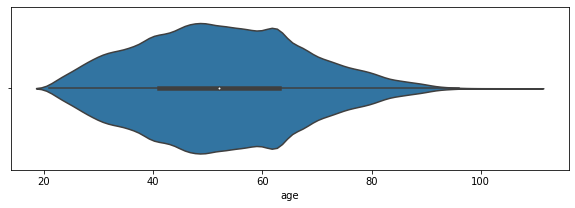

In [18]:
plt.figure(figsize=(10, 3))
sns.violinplot(data['age']);

In [19]:
bins = [20, 36, 50, 65, 80, 100, float('inf')]
data['Box_Age'] = pd.cut(data['age'], bins=bins, include_lowest=False)
tmp_woe = cal_woe('Box_Age')

,bad,good,margin_bad,margin_good,woe,sample_ratio
Box_Age,,,,,,
"(20.0, 36.0]",2628.0,21236.0,0.262118,0.151715,0.546793,0.159094
"(36.0, 50.0]",3899.0,42370.0,0.388889,0.302701,0.250547,0.308462
"(50.0, 65.0]",2809.0,48458.0,0.280172,0.346195,-0.211601,0.341782
"(65.0, 80.0]",590.0,23073.0,0.058847,0.164839,-1.030028,0.157754
"(80.0, 100.0]",99.0,4824.0,0.009874,0.034464,-1.249971,0.032820
"(100.0, inf]",1.0,12.0,0.000100,0.000086,0.151361,0.000087


In [20]:
# 调整分箱
bins = [20, 35, 45, 55, 65, float('inf')]
data['Box_Age'] = pd.cut(data['age'], bins=bins, include_lowest=False)
tmp_woe = cal_woe('Box_Age')

,bad,good,margin_bad,margin_good,woe,sample_ratio
Box_Age,,,,,,
"(20.0, 35.0]",2391.0,19094.0,0.238480,0.136412,0.558605,0.143234
"(35.0, 45.0]",2628.0,27191.0,0.262118,0.194259,0.299605,0.198795
"(45.0, 55.0]",2786.0,33904.0,0.277878,0.242218,0.137342,0.244602
"(55.0, 65.0]",1531.0,31875.0,0.152703,0.227722,-0.399633,0.222708
"(65.0, inf]",690.0,27909.0,0.068821,0.199388,-1.063745,0.190661


In [21]:
# 满足样本比率和单调性要求
data = data.merge(tmp_woe.rename('WOE_Age'), on='Box_Age', how='inner')

### NumberOfTime30-59DaysPastDueNotWorse
借款人（过去2年中没有恶化）逾期30-59天的次数

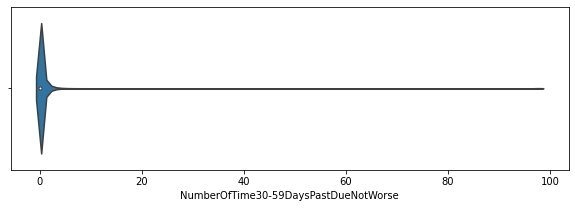

In [22]:
plt.figure(figsize=(10, 3))
sns.violinplot(data['NumberOfTime30-59DaysPastDueNotWorse']);

In [23]:
df_tmp = pd.DataFrame([data['NumberOfTime30-59DaysPastDueNotWorse'].value_counts(), 
                       data['NumberOfTime30-59DaysPastDueNotWorse'].value_counts() / data.shape[0]]).T.sort_index()
df_tmp.columns = ['NumberOfTime30-59DaysPastDueNotWorse', 'sample_ratio']
df_tmp

,NumberOfTime30-59DaysPastDueNotWorse,sample_ratio
0,211208.0,0.839787
1,26869.0,0.106834
2,7766.0,0.030878
3,2955.0,0.011749
4,1257.0,0.004998
5,547.0,0.002175
6,228.0,0.000907
7,96.0,0.000382
8,53.0,0.000211
9,22.0,0.000087


In [24]:
pd.DataFrame(df_tmp['sample_ratio'][::-1].cumsum()).T

,98,96,19,13,12,11,10,9,8,7,6,5,4,3,2,1,0
sample_ratio,0.001897,0.00192,0.001924,0.001928,0.00194,0.001948,0.001992,0.00208,0.00229,0.002672,0.003579,0.005753,0.010751,0.022501,0.053379,0.160213,1.0


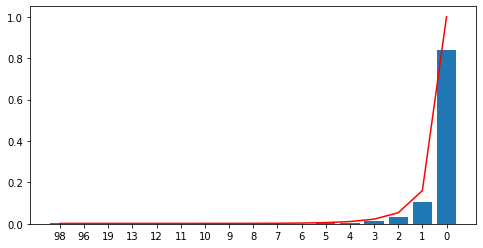

In [25]:
x = [str(i) for i in df_tmp.index[::-1]]
plt.figure(figsize=(8, 4))
plt.bar(x, df_tmp['sample_ratio'][::-1])
plt.plot(x, df_tmp['sample_ratio'][::-1].cumsum(), color='r')

In [26]:
# 为了满足每个分箱样本率5%以上的要求，只能分为3个箱
def cut_bins(x):
    if x == 0:
        return '0'
    elif x == 1:
        return '1'
    else:
        return '2以上'

data['Box_NOT3059DPDNW'] = data['NumberOfTime30-59DaysPastDueNotWorse'].apply(cut_bins)
tmp_woe = cal_woe('Box_NOT3059DPDNW')

,bad,good,margin_bad,margin_good,woe,sample_ratio
Box_NOT3059DPDNW,,,,,,
0,5041.0,120977.0,0.502793,0.864288,-0.541728,0.840126
1,2409.0,13623.0,0.240275,0.097326,0.903720,0.106881
2以上,2576.0,5373.0,0.256932,0.038386,1.901119,0.052994


In [27]:
# 满足样本比率和单调性要求
data = data.merge(tmp_woe.rename('WOE_NOT3059DPDNW'), on='Box_NOT3059DPDNW', how='inner')

### DebtRatio
每月还债、赡养费、生活费之和除以每月总收入

In [28]:
data['DebtRatio'].describe(percentiles=[0.25, 0.5, 0.75, 0.8, 0.9])

count    251502.000000
mean        349.563856
std        1884.795635
min           0.000000
25%           0.174330
50%           0.365611
75%           0.861754
80%           3.909227
90%        1256.000000
max      329664.000000
Name: DebtRatio, dtype: float64

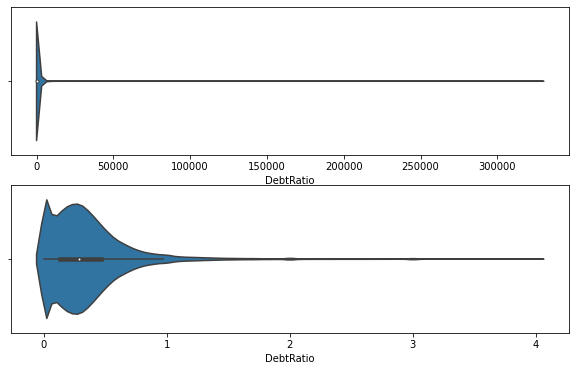

In [29]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
sns.violinplot(data['DebtRatio'], ax=ax[0])
sns.violinplot(data[data['DebtRatio'] < 4]['DebtRatio'], ax=ax[1]);  # 查看比值在4以内的分布

In [30]:
bins = [0, 0.15, 0.3, 0.45, 0.6, 0.75, 1, float('inf')]
data['Box_DebtRatio'] = pd.cut(data['DebtRatio'], bins=bins, include_lowest=True)
tmp_woe = cal_woe('Box_DebtRatio')

,bad,good,margin_bad,margin_good,woe,sample_ratio
Box_DebtRatio,,,,,,
"(-0.001, 0.15]",1998.0,30883.0,0.199282,0.220635,-0.101791,0.219208
"(0.15, 0.3]",1676.0,28004.0,0.167165,0.200067,-0.179670,0.197868
"(0.3, 0.45]",1576.0,23597.0,0.157191,0.168583,-0.069962,0.167821
"(0.45, 0.6]",1147.0,13213.0,0.114403,0.094397,0.192216,0.095734
"(0.6, 0.75]",742.0,6599.0,0.074008,0.047145,0.450944,0.048940
"(0.75, 1.0]",596.0,4831.0,0.059445,0.034514,0.543700,0.036180
"(1.0, inf]",2291.0,32846.0,0.228506,0.234660,-0.026574,0.234248


In [31]:
# 调整分箱
bins = [0, 0.3, 0.45, 0.6, 2.5, 10, float('inf')]
data['Box_DebtRatio'] = pd.cut(data['DebtRatio'], bins=bins, include_lowest=True)
tmp_woe = cal_woe('Box_DebtRatio')

,bad,good,margin_bad,margin_good,woe,sample_ratio
Box_DebtRatio,,,,,,
"(-0.001, 0.3]",3674.0,58887.0,0.366447,0.420703,-0.138072,0.417076
"(0.3, 0.45]",1576.0,23597.0,0.157191,0.168583,-0.069962,0.167821
"(0.45, 0.6]",1147.0,13213.0,0.114403,0.094397,0.192216,0.095734
"(0.6, 2.5]",1921.0,15330.0,0.191602,0.109521,0.559302,0.115007
"(2.5, 10.0]",99.0,1678.0,0.009874,0.011988,-0.193970,0.011847
"(10.0, inf]",1609.0,27268.0,0.160483,0.194809,-0.193833,0.192515


In [32]:
# 基于常识来看，这个DebtRatio过大的时候感觉是不正常的，可能是录入错误，或者用户故意欺瞒；而2.5到10以及10到inf的woe差不多，因此进行合并
bins = [0, 0.3, 0.45, 0.6, 2.5, float('inf')]
data['Box_DebtRatio'] = pd.cut(data['DebtRatio'], bins=bins, include_lowest=True)
tmp_woe = cal_woe('Box_DebtRatio')

,bad,good,margin_bad,margin_good,woe,sample_ratio
Box_DebtRatio,,,,,,
"(-0.001, 0.3]",3674.0,58887.0,0.366447,0.420703,-0.138072,0.417076
"(0.3, 0.45]",1576.0,23597.0,0.157191,0.168583,-0.069962,0.167821
"(0.45, 0.6]",1147.0,13213.0,0.114403,0.094397,0.192216,0.095734
"(0.6, 2.5]",1921.0,15330.0,0.191602,0.109521,0.559302,0.115007
"(2.5, inf]",1708.0,28946.0,0.170357,0.206797,-0.193841,0.204361


In [33]:
# 除了最后的异常组，其他满足单调性
data = data.merge(tmp_woe.rename('WOE_DebtRatio'), on='Box_DebtRatio', how='inner')

### MonthlyIncome
存在缺失值

In [34]:
# 缺失比例不低，可单独作为一个箱处理
data['MonthlyIncome'].isna().sum() / data.shape[0]

0.19814554158615041

In [35]:
data['MonthlyIncome'].describe(percentiles=[0.25, 0.5, 0.75, 0.95])

count    2.016680e+05
mean     6.744822e+03
std      2.571767e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.212000e+03
95%      1.458300e+04
max      7.727000e+06
Name: MonthlyIncome, dtype: float64

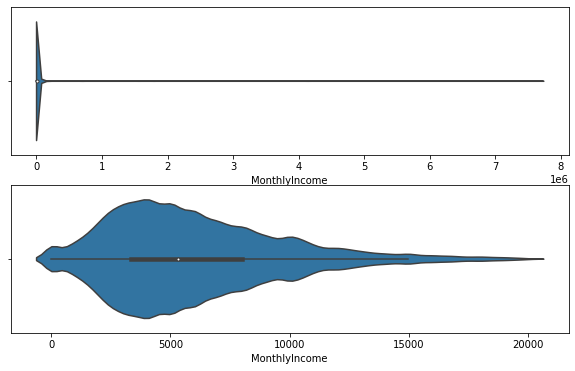

In [36]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
sns.violinplot(data['MonthlyIncome'], ax=ax[0])
sns.violinplot(data[data['MonthlyIncome'] < 20000]['MonthlyIncome'], ax=ax[1]);  # 查看收入在两万以下的分布

In [37]:
def cut_bins(x):
    if np.isnan(x):
        return 'Null'
    else:
        if 0 <= x <= 4000:
            return '[0, 4000]'
        elif x <= 6000:
            return '(4000, 6000]'
        elif x <= 8000:
            return '(6000, 8000]'
        elif x <= 10000:
            return '(8000, 10000]'
        else:
            return '(10000, inf]'

In [38]:
data['Box_MonthlyIncome'] = data['MonthlyIncome'].apply(cut_bins)
tmp_woe = cal_woe('Box_MonthlyIncome')

,bad,good,margin_bad,margin_good,woe,sample_ratio
Box_MonthlyIncome,,,,,,
"(10000, inf]",792.0,17527.0,0.078995,0.125217,-0.460669,0.122127
"(4000, 6000]",2105.0,26570.0,0.209954,0.189822,0.100801,0.191168
"(6000, 8000]",1173.0,18571.0,0.116996,0.132676,-0.125769,0.131628
"(8000, 10000]",661.0,12471.0,0.065929,0.089096,-0.301140,0.087547
Null,1669.0,28062.0,0.166467,0.200482,-0.185924,0.198208
"[0, 4000]",3626.0,36772.0,0.361660,0.262708,0.319661,0.269322


In [39]:
# 除了缺失值组，其他满足单调性
data = data.merge(tmp_woe.rename('WOE_MonthlyIncome'), on='Box_MonthlyIncome', how='inner')

### NumberOfOpenCreditLinesAndLoans

In [40]:
data['NumberOfOpenCreditLinesAndLoans'].describe(percentiles=[0.25, 0.5, 0.75, 0.95])

count    251502.000000
mean          8.453074
std           5.145202
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
95%          18.000000
max          85.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

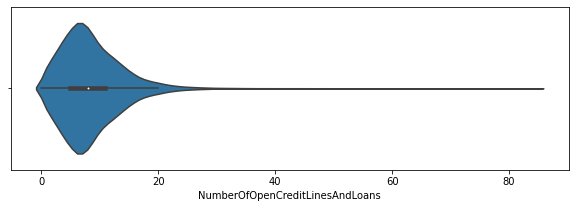

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
sns.violinplot(data['NumberOfOpenCreditLinesAndLoans'], ax=ax);

In [42]:
bins = [0, 3, 6, 9, 12, 15, float('inf')]
data['Box_NOOCLAL'] = pd.cut(data['NumberOfOpenCreditLinesAndLoans'], bins=bins, include_lowest=True)
tmp_woe = cal_woe('Box_NOOCLAL')

,bad,good,margin_bad,margin_good,woe,sample_ratio
Box_NOOCLAL,,,,,,
"(-0.001, 3.0]",2360.0,19690.0,0.235388,0.140670,0.514819,0.147001
"(3.0, 6.0]",2316.0,35837.0,0.230999,0.256028,-0.102871,0.254355
"(6.0, 9.0]",2017.0,35145.0,0.201177,0.251084,-0.221603,0.247748
"(9.0, 12.0]",1487.0,23463.0,0.148314,0.167625,-0.122396,0.166334
"(12.0, 15.0]",891.0,12967.0,0.088869,0.092639,-0.041551,0.092387
"(15.0, inf]",955.0,12871.0,0.095252,0.091953,0.035247,0.092174


In [43]:
# 调整分箱
bins = [0, 2, 3, 5, 7, 8, 14, float('inf')]
data['Box_NOOCLAL'] = pd.cut(data['NumberOfOpenCreditLinesAndLoans'], bins=bins, include_lowest=True)
tmp_woe = cal_woe('Box_NOOCLAL')

,bad,good,margin_bad,margin_good,woe,sample_ratio
Box_NOOCLAL,,,,,,
"(-0.001, 2.0]",1678.0,11314.0,0.167365,0.080830,0.727830,0.086614
"(2.0, 3.0]",682.0,8376.0,0.068023,0.059840,0.128172,0.060387
"(3.0, 5.0]",1562.0,22978.0,0.155795,0.164160,-0.052302,0.163601
"(5.0, 7.0]",1501.0,25357.0,0.149711,0.181156,-0.190655,0.179055
"(7.0, 8.0]",606.0,11956.0,0.060443,0.085416,-0.345841,0.083747
"(8.0, 14.0]",2760.0,43758.0,0.275284,0.312617,-0.127176,0.310122
"(14.0, inf]",1237.0,16234.0,0.123379,0.115980,0.061849,0.116474


In [44]:
# 调了几次，都不满足单调性，只能先用着了
data = data.merge(tmp_woe.rename('WOE_NOOCLAL'), on='Box_NOOCLAL', how='inner')

### NumberOfTimes90DaysLate

In [45]:
# 绝大多数都是0
data['NumberOfTimes90DaysLate'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95])

count    251502.000000
mean          0.278372
std           4.312547
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
90%           0.000000
95%           1.000000
max          98.000000
Name: NumberOfTimes90DaysLate, dtype: float64

In [46]:
df_tmp = pd.DataFrame([data['NumberOfTimes90DaysLate'].value_counts(), 
                       data['NumberOfTimes90DaysLate'].value_counts() / data.shape[0]]).T.sort_index()
df_tmp.columns = ['NumberOfTimes90DaysLate', 'sample_ratio']
df_tmp

,NumberOfTimes90DaysLate,sample_ratio
0,237446.0,0.944112
1,8837.0,0.035137
2,2617.0,0.010405
3,1112.0,0.004421
4,482.0,0.001916
5,233.0,0.000926
6,124.0,0.000493
7,64.0,0.000254
8,40.0,0.000159
9,33.0,0.000131


In [47]:
bins = [0, 1, float('inf')]
data['Box_NOTDL'] = pd.cut(data['NumberOfTimes90DaysLate'], bins=bins, include_lowest=True, right=False)
tmp_woe = cal_woe('Box_NOTDL')

,bad,good,margin_bad,margin_good,woe,sample_ratio
Box_NOTDL,,,,,,
"[0.0, 1.0)",6554.0,135107.0,0.6537,0.965236,-0.389724,0.944413
"[1.0, inf)",3472.0,4866.0,0.3463,0.034764,2.298726,0.055587


In [48]:
data = data.merge(tmp_woe.rename('WOE_NOTDL'), on='Box_NOTDL', how='inner')

### NumberRealEstateLoansOrLines
抵押贷款和房地产贷款（包括房屋净值信贷额度）的数量

In [49]:
df_tmp = pd.DataFrame([data['NumberRealEstateLoansOrLines'].value_counts(), 
                       data['NumberRealEstateLoansOrLines'].value_counts() / data.shape[0]]).sort_index(axis=1)
df_tmp.index = ['NumberRealEstateLoansOrLines', 'sample_ratio']
df_tmp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,25,26,29,32,37,54
NumberRealEstateLoansOrLines,94254.000000,88008.00000,52476.00000,10723.000000,3584.00000,1141.000000,547.000000,279.000000,151.0000,127.000000,60.000000,42.000000,29.000000,20.00000,16.000000,11.000000,6.000000,4.000000,3.000000,4.000000,3.000000,2.000000,2.000000,4.000000,1.000000,2.000000,1.000000,1.000000,1.000000
sample_ratio,0.374764,0.34993,0.20865,0.042636,0.01425,0.004537,0.002175,0.001109,0.0006,0.000505,0.000239,0.000167,0.000115,0.00008,0.000064,0.000044,0.000024,0.000016,0.000012,0.000016,0.000012,0.000008,0.000008,0.000016,0.000004,0.000008,0.000004,0.000004,0.000004


In [50]:
pd.DataFrame(df_tmp.T['sample_ratio'][::-1].cumsum()).T

,54,37,32,29,26,25,23,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0
sample_ratio,0.000004,0.000008,0.000012,0.00002,0.000024,0.00004,0.000048,0.000056,0.000068,0.000083,0.000095,0.000111,0.000135,0.000179,0.000243,0.000322,0.000437,0.000604,0.000843,0.001348,0.001948,0.003058,0.005233,0.009769,0.02402,0.066656,0.275306,0.625236,1.0


In [51]:
bins = [0, 1, 2, 3, float('inf')]
data['Box_NRELOL'] = pd.cut(data['NumberRealEstateLoansOrLines'], bins=bins, include_lowest=True, right=False)
tmp_woe = cal_woe('Box_NRELOL')

,bad,good,margin_bad,margin_good,woe,sample_ratio
Box_NRELOL,,,,,,
"[0.0, 1.0)",4672.0,51516.0,0.465988,0.368042,0.235963,0.374589
"[1.0, 2.0)",2748.0,49590.0,0.274087,0.354283,-0.256648,0.348922
"[2.0, 3.0)",1765.0,29756.0,0.176042,0.212584,-0.188612,0.210141
"[3.0, inf)",841.0,9111.0,0.083882,0.065091,0.253622,0.066347


In [52]:
bins = [0, 1, 3, float('inf')]
data['Box_NRELOL'] = pd.cut(data['NumberRealEstateLoansOrLines'], bins=bins, include_lowest=True, right=False)
tmp_woe = cal_woe('Box_NRELOL')

,bad,good,margin_bad,margin_good,woe,sample_ratio
Box_NRELOL,,,,,,
"[0.0, 1.0)",4672.0,51516.0,0.465988,0.368042,0.235963,0.374589
"[1.0, 3.0)",4513.0,79346.0,0.450130,0.566866,-0.230588,0.559064
"[3.0, inf)",841.0,9111.0,0.083882,0.065091,0.253622,0.066347


In [53]:
data = data.merge(tmp_woe.rename('WOE_NRELOL'), on='Box_NRELOL', how='inner')

### NumberOfTime60-89DaysPastDueNotWorse

In [54]:
df_tmp = pd.DataFrame([data['NumberOfTime60-89DaysPastDueNotWorse'].value_counts(), 
                       data['NumberOfTime60-89DaysPastDueNotWorse'].value_counts() / data.shape[0]]).sort_index(axis=1)
df_tmp.index = ['NumberOfTime60-89DaysPastDueNotWorse', 'sample_ratio']
df_tmp

,0,1,2,3,4,5,6,7,8,9,11,96,98
NumberOfTime60-89DaysPastDueNotWorse,238770.000000,9594.000000,1849.000000,534.000000,166.00000,59.000000,23.000000,16.000000,3.000000,4.000000,1.000000,6.000000,477.000000
sample_ratio,0.949376,0.038147,0.007352,0.002123,0.00066,0.000235,0.000091,0.000064,0.000012,0.000016,0.000004,0.000024,0.001897


In [55]:
bins = [0, 1, float('inf')]
data['Box_NOT6089DPDNW'] = pd.cut(data['NumberOfTime60-89DaysPastDueNotWorse'], bins=bins, include_lowest=True, right=False)
tmp_woe = cal_woe('Box_NOT6089DPDNW')

,bad,good,margin_bad,margin_good,woe,sample_ratio
Box_NOT6089DPDNW,,,,,,
"[0.0, 1.0)",7256.0,135139.0,0.723718,0.965465,-0.288207,0.949306
"[1.0, inf)",2770.0,4834.0,0.276282,0.034535,2.079441,0.050694


In [56]:
data = data.merge(tmp_woe.rename('WOE_NOT6089DPDNW'), on='Box_NOT6089DPDNW', how='inner')

### NumberOfDependents
存在缺失值

In [57]:
data['NumberOfDependents'].isna().sum() / data.shape[0]

0.026043530468942592

In [58]:
df_tmp = pd.DataFrame([data['NumberOfDependents'].value_counts(dropna=False), 
                       data['NumberOfDependents'].value_counts(dropna=False) / data.shape[0]]).sort_index(axis=1)
df_tmp.index = ['NumberOfDependents', 'sample_ratio']
df_tmp

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,13.0,20.0,43.0,NaN
NumberOfDependents,145520.000000,43934.000000,32819.000000,16106.000000,4857.000000,1272.000000,283.000000,101.000000,40.000000,8.000000,8.000000,1.000000,2.000000,1.000000,6550.000000
sample_ratio,0.578604,0.174686,0.130492,0.064039,0.019312,0.005058,0.001125,0.000402,0.000159,0.000032,0.000032,0.000004,0.000008,0.000004,0.026044


In [59]:
def cut_bins(x):
    if np.isnan(x):
        return 'Null'
    else:
        if x < 1:
            return '[0, 1)'
        elif x < 2:
            return '[1, 2)'
        elif x <= 3:
            return '[2, 3)'
        else:
            return '[3, inf)'

data['Box_NOP'] = data['NumberOfDependents'].apply(cut_bins)
tmp_woe = cal_woe('Box_NOP')

,bad,good,margin_bad,margin_good,woe,sample_ratio
Box_NOP,,,,,,
Null,179.0,3745.0,0.017854,0.026755,-0.404523,0.026160
"[0, 1)",5095.0,81807.0,0.508179,0.584448,-0.139835,0.579351
"[1, 2)",1935.0,24381.0,0.192998,0.174184,0.102571,0.175441
"[2, 3)",2421.0,26583.0,0.241472,0.189915,0.240177,0.193361
"[3, inf)",396.0,3457.0,0.039497,0.024698,0.469526,0.025687


In [60]:
data = data.merge(tmp_woe.rename('WOE_NOP'), on='Box_NOP', how='inner')

查看相关结果

In [62]:
cols = ['SeriousDlqin2yrs'] + [col for col in data.columns if col.startswith('WOE') or col.startswith('Box')]
new_data = data[cols]
new_data

,SeriousDlqin2yrs,Box_RUOUL,WOE_RUOUL,Box_Age,WOE_Age,Box_NOT3059DPDNW,WOE_NOT3059DPDNW,Box_DebtRatio,WOE_DebtRatio,Box_MonthlyIncome,WOE_MonthlyIncome,Box_NOOCLAL,WOE_NOOCLAL,Box_NOTDL,WOE_NOTDL,Box_NRELOL,WOE_NRELOL,Box_NOT6089DPDNW,WOE_NOT6089DPDNW,Box_NOP,WOE_NOP
0,1.0,"(0.7, 0.9]",0.890636,"(35.0, 45.0]",0.299605,2以上,1.901119,"(0.6, 2.5]",0.559302,"(8000, 10000]",-0.301140,"(8.0, 14.0]",-0.127176,"[0.0, 1.0)",-0.389724,"[3.0, inf)",0.253622,"[0.0, 1.0)",-0.288207,"[2, 3)",0.240177
1,-1.0,"(0.9, inf]",1.391056,"(35.0, 45.0]",0.299605,2以上,1.901119,"(0.6, 2.5]",0.559302,"(8000, 10000]",-0.301140,"(8.0, 14.0]",-0.127176,"[0.0, 1.0)",-0.389724,"[3.0, inf)",0.253622,"[0.0, 1.0)",-0.288207,"[2, 3)",0.240177
2,-1.0,"(0.9, inf]",1.391056,"(35.0, 45.0]",0.299605,2以上,1.901119,"(0.6, 2.5]",0.559302,"(8000, 10000]",-0.301140,"(8.0, 14.0]",-0.127176,"[0.0, 1.0)",-0.389724,"[3.0, inf)",0.253622,"[0.0, 1.0)",-0.288207,"[2, 3)",0.240177
3,0.0,"(0.1, 0.3]",-0.791856,"(35.0, 45.0]",0.299605,2以上,1.901119,"(0.6, 2.5]",0.559302,"(8000, 10000]",-0.301140,"(8.0, 14.0]",-0.127176,"[0.0, 1.0)",-0.389724,"[3.0, inf)",0.253622,"[0.0, 1.0)",-0.288207,"[2, 3)",0.240177
4,0.0,"(-0.001, 0.1]",-1.357051,"(35.0, 45.0]",0.299605,2以上,1.901119,"(0.6, 2.5]",0.559302,"(8000, 10000]",-0.301140,"(8.0, 14.0]",-0.127176,"[0.0, 1.0)",-0.389724,"[3.0, inf)",0.253622,"[0.0, 1.0)",-0.288207,"[2, 3)",0.240177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251497,-1.0,"(0.9, inf]",1.391056,"(20.0, 35.0]",0.558605,1,0.903720,"(2.5, inf]",-0.193841,Null,-0.185924,"(-0.001, 2.0]",0.727830,"[1.0, inf)",2.298726,"[0.0, 1.0)",0.235963,"[1.0, inf)",2.079441,Null,-0.404523
251498,-1.0,"(0.9, inf]",1.391056,"(20.0, 35.0]",0.558605,1,0.903720,"(2.5, inf]",-0.193841,Null,-0.185924,"(-0.001, 2.0]",0.727830,"[1.0, inf)",2.298726,"[0.0, 1.0)",0.235963,"[1.0, inf)",2.079441,Null,-0.404523
251499,-1.0,"(0.9, inf]",1.391056,"(45.0, 55.0]",0.137342,1,0.903720,"(2.5, inf]",-0.193841,Null,-0.185924,"(-0.001, 2.0]",0.727830,"[1.0, inf)",2.298726,"[0.0, 1.0)",0.235963,"[1.0, inf)",2.079441,Null,-0.404523
251500,1.0,"(0.9, inf]",1.391056,"(65.0, inf]",-1.063745,1,0.903720,"(2.5, inf]",-0.193841,Null,-0.185924,"(-0.001, 2.0]",0.727830,"[1.0, inf)",2.298726,"[0.0, 1.0)",0.235963,"[1.0, inf)",2.079441,Null,-0.404523


## 计算IV值

In [114]:
def cal_IV(col):
    tmp_data = new_data[new_data['SeriousDlqin2yrs'] != -1]
    total_bad, total_good = tmp_data['SeriousDlqin2yrs'].sum(), (1 - tmp_data['SeriousDlqin2yrs']).sum()
    box_bad = tmp_data.groupby('Box_' + col)['SeriousDlqin2yrs'].sum()
    box_good = tmp_data.groupby('Box_' + col)['SeriousDlqin2yrs'].count() - box_bad
    df_box = pd.DataFrame([box_bad, box_good], index=['bad', 'good']).T
    df_box['margin_bad'] = df_box['bad'] / total_bad
    df_box['margin_good'] = df_box['good'] / total_good
    df_box['WOE'] = np.log(df_box['margin_bad'] / df_box['margin_good'])
    df_box['IV'] = (df_box['margin_bad'] - df_box['margin_good']) * df_box['WOE']
    df_box.index = [str(i) for i in df_box.index]
    df_box.loc['SUM'] = df_box.sum()
    return df_box[['IV']].T

In [66]:
cols = [col.replace('WOE_', '') for col in new_data.columns if col.startswith('WOE')]
cols

['RUOUL',
 'Age',
 'NOT3059DPDNW',
 'DebtRatio',
 'MonthlyIncome',
 'NOOCLAL',
 'NOTDL',
 'NRELOL',
 'NOT6089DPDNW',
 'NOP']

In [121]:
for col in cols:
    iv = cal_IV(col)
    display(iv)
    print(f'特征{col}对应WOE的IV值为{iv.loc["IV", "SUM"]:.3f}')

,"(-0.001, 0.1]","(0.1, 0.3]","(0.3, 0.5]","(0.5, 0.7]","(0.7, 0.9]","(0.9, inf]",SUM
IV,0.455279,0.085356,0.002008,0.013635,0.076887,0.467574,1.10074


特征RUOUL对应WOE的IV值为1.101


,"(20.0, 35.0]","(35.0, 45.0]","(45.0, 55.0]","(55.0, 65.0]","(65.0, inf]",SUM
IV,0.057016,0.020331,0.004898,0.02998,0.13889,0.251115


特征Age对应WOE的IV值为0.251


,0,1,2以上,SUM
IV,0.195832,0.129186,0.415482,0.7405


特征NOT3059DPDNW对应WOE的IV值为0.741


,"(-0.001, 0.3]","(0.3, 0.45]","(0.45, 0.6]","(0.6, 2.5]","(2.5, inf]",SUM
IV,0.007491,0.000797,0.003845,0.045908,0.007064,0.065105


特征DebtRatio对应WOE的IV值为0.065


,"(10000, inf]","(4000, 6000]","(6000, 8000]","(8000, 10000]",Null,"[0, 4000]",SUM
IV,0.021293,0.002029,0.001972,0.006977,0.006324,0.031631,0.070226


特征MonthlyIncome对应WOE的IV值为0.070


,"(-0.001, 2.0]","(2.0, 3.0]","(3.0, 5.0]","(5.0, 7.0]","(7.0, 8.0]","(8.0, 14.0]","(14.0, inf]",SUM
IV,0.062983,0.001049,0.000438,0.005995,0.008637,0.004748,0.000458,0.084307


特征NOOCLAL对应WOE的IV值为0.084


,"[0.0, 1.0)","[1.0, inf)",SUM
IV,0.121413,0.716136,0.837548


特征NOTDL对应WOE的IV值为0.838


,"[0.0, 1.0)","[1.0, 3.0)","[3.0, inf)",SUM
IV,0.023112,0.026918,0.004766,0.054795


特征NRELOL对应WOE的IV值为0.055


,"[0.0, 1.0)","[1.0, inf)",SUM
IV,0.069673,0.502697,0.572371


特征NOT6089DPDNW对应WOE的IV值为0.572


,Null,"[0, 1)","[1, 2)","[2, 3)","[3, inf)",SUM
IV,0.003601,0.010665,0.00193,0.012383,0.006949,0.035528


特征NOP对应WOE的IV值为0.036


从计算的结果来看，所有特征的WOE的IV值均大于0.02，均具备一定的预测效果。

## 评分卡训练与解释

In [122]:
from sklearn.linear_model import LogisticRegression

In [129]:
cols = [col for col in new_data.columns if col.startswith('WOE')]
cols

['WOE_RUOUL',
 'WOE_Age',
 'WOE_NOT3059DPDNW',
 'WOE_DebtRatio',
 'WOE_MonthlyIncome',
 'WOE_NOOCLAL',
 'WOE_NOTDL',
 'WOE_NRELOL',
 'WOE_NOT6089DPDNW',
 'WOE_NOP']

In [123]:
new_train = new_data[new_data['SeriousDlqin2yrs'] != -1]
new_test = new_data[new_data['SeriousDlqin2yrs'] == -1]

In [131]:
X_train = new_train[cols]
y_train = new_train['SeriousDlqin2yrs']
X_test = new_test[cols]

In [128]:
lr = LogisticRegression()

In [132]:
lr.fit(X_train, y_train)

LogisticRegression()

In [136]:
lr.coef_[0]

array([0.61104535, 0.41548447, 0.52926097, 0.8871434 , 0.05060308,
       0.06416064, 0.53135695, 0.59583099, 0.40458013, 0.23802525])

In [142]:
result = pd.DataFrame([lr.coef_[0]], columns=X_train.columns, index=['Weight'])
result.sort_values('Weight', axis=1, ascending=False).T

,Weight
WOE_DebtRatio,0.887143
WOE_RUOUL,0.611045
WOE_NRELOL,0.595831
WOE_NOTDL,0.531357
WOE_NOT3059DPDNW,0.529261
WOE_Age,0.415484
WOE_NOT6089DPDNW,0.404580
WOE_NOP,0.238025
WOE_NOOCLAL,0.064161
WOE_MonthlyIncome,0.050603


从训练出来的LR模型的变量系数来看，负债率、RevolvingUtilizationOfUnsecuredLines、NumberRealEstateLoansOrLines等字段对于预测是否违约的作用更明显，而月收入、未结信用额度和贷款数量等则影响相对较小。

## 思考

但考虑到计算出来的WOE的取值范围有一定差异，是否应该对WOE进行归一化处理，来让LR模型的变量系数更好地反映字段的重要性呢？